In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import Decision Tree Regressor from sklearn
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Display plots inline
%matplotlib inline


In [2]:
# Load the diabetes dataset
diabetes = load_diabetes()

# Convert it into a DataFrame
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)

# Add the target variable to the DataFrame
df['target'] = diabetes.target

# Display the first few rows
df.head()


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [3]:
# Define X (features) and y (target)
X = df.drop('target', axis=1)
y = df['target']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shapes of the training and testing sets
X_train.shape, X_test.shape


((353, 10), (89, 10))

In [4]:
# Initialize Decision Tree Regressor with default parameters
tree_model = DecisionTreeRegressor(random_state=42)

# Train the model on the training data
tree_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = tree_model.predict(X_test)


In [5]:
# Calculate MSE and R-squared
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation results
print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R²): {r2}')


Mean Squared Error (MSE): 4976.797752808989
R-squared (R²): 0.060653981041140725


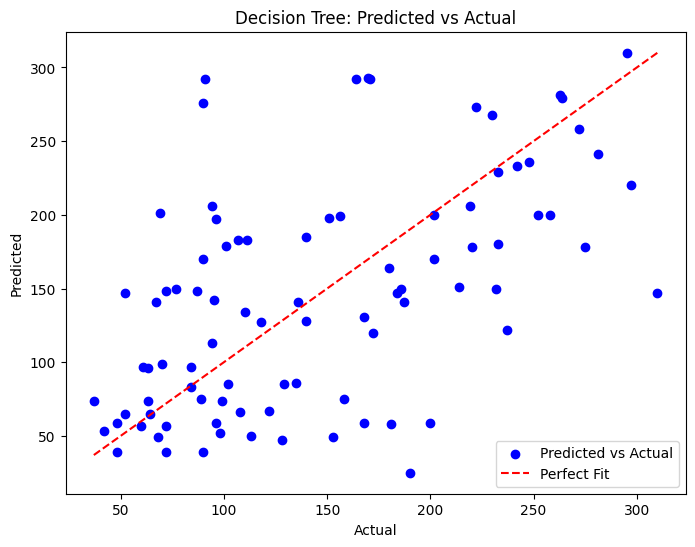

In [6]:
# Plot actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Perfect Fit')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Decision Tree: Predicted vs Actual')
plt.legend()
plt.show()


In [7]:
# Initialize Decision Tree with max_depth
tree_model_depth = DecisionTreeRegressor(max_depth=5, random_state=42)

# Train the model
tree_model_depth.fit(X_train, y_train)

# Make predictions and evaluate
y_pred_depth = tree_model_depth.predict(X_test)
mse_depth = mean_squared_error(y_test, y_pred_depth)
r2_depth = r2_score(y_test, y_pred_depth)

# Print the results
print(f'Max Depth = 5: MSE = {mse_depth}, R-squared = {r2_depth}')


Max Depth = 5: MSE = 3526.0155119980145, R-squared = 0.3344819704370976


In [8]:
# Initialize Decision Tree with min_samples_split
tree_model_split = DecisionTreeRegressor(min_samples_split=10, random_state=42)

# Train the model
tree_model_split.fit(X_train, y_train)

# Make predictions and evaluate
y_pred_split = tree_model_split.predict(X_test)
mse_split = mean_squared_error(y_test, y_pred_split)
r2_split = r2_score(y_test, y_pred_split)

# Print the results
print(f'Min Samples Split = 10: MSE = {mse_split}, R-squared = {r2_split}')


Min Samples Split = 10: MSE = 4337.005800926279, R-squared = 0.1814115550501979


In [9]:
# Initialize Decision Tree with min_samples_leaf
tree_model_leaf = DecisionTreeRegressor(min_samples_leaf=5, random_state=42)

# Train the model
tree_model_leaf.fit(X_train, y_train)

# Make predictions and evaluate
y_pred_leaf = tree_model_leaf.predict(X_test)
mse_leaf = mean_squared_error(y_test, y_pred_leaf)
r2_leaf = r2_score(y_test, y_pred_leaf)

# Print the results
print(f'Min Samples Leaf = 5: MSE = {mse_leaf}, R-squared = {r2_leaf}')


Min Samples Leaf = 5: MSE = 3419.9637575762717, R-squared = 0.3544987157957853


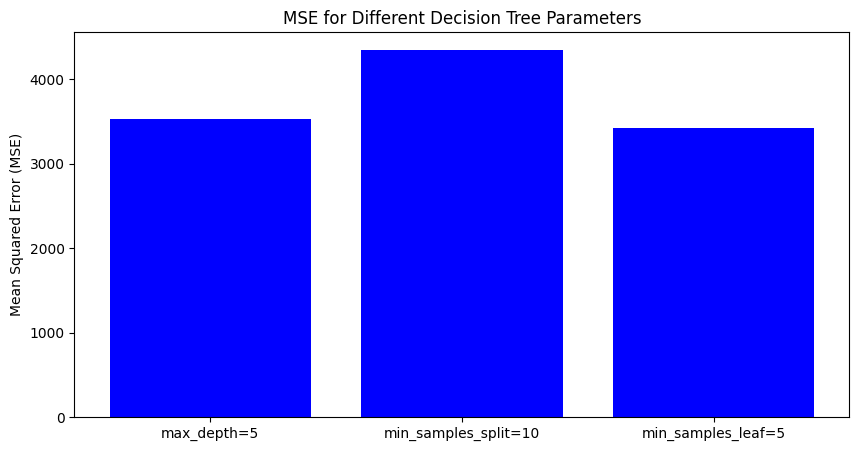

In [10]:
# List of parameter values and their corresponding MSEs
parameter_values = ['max_depth=5', 'min_samples_split=10', 'min_samples_leaf=5']
mse_values = [mse_depth, mse_split, mse_leaf]

# Plot MSE for different parameter settings
plt.figure(figsize=(10, 5))
plt.bar(parameter_values, mse_values, color='blue')
plt.title('MSE for Different Decision Tree Parameters')
plt.ylabel('Mean Squared Error (MSE)')
plt.show()


In [11]:
# Initialize lists to store results
depth_values = [3, 5, 7, 10, 15]
split_values = [2, 5, 10, 20]
leaf_values = [1, 2, 5, 10]

mse_depth_results = []
r2_depth_results = []

mse_split_results = []
r2_split_results = []

mse_leaf_results = []
r2_leaf_results = []

# Loop through different max_depth values
for max_depth in depth_values:
    tree_model = DecisionTreeRegressor(max_depth=max_depth, random_state=42)
    tree_model.fit(X_train, y_train)
    y_pred = tree_model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mse_depth_results.append(mse)
    r2_depth_results.append(r2)

# Loop through different min_samples_split values
for min_samples_split in split_values:
    tree_model = DecisionTreeRegressor(min_samples_split=min_samples_split, random_state=42)
    tree_model.fit(X_train, y_train)
    y_pred = tree_model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mse_split_results.append(mse)
    r2_split_results.append(r2)

# Loop through different min_samples_leaf values
for min_samples_leaf in leaf_values:
    tree_model = DecisionTreeRegressor(min_samples_leaf=min_samples_leaf, random_state=42)
    tree_model.fit(X_train, y_train)
    y_pred = tree_model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mse_leaf_results.append(mse)
    r2_leaf_results.append(r2)

# Print results for max_depth
print("Max Depth Results:")
for i, depth in enumerate(depth_values):
    print(f"max_depth={depth}: MSE = {mse_depth_results[i]}, R-squared = {r2_depth_results[i]}")

# Print results for min_samples_split
print("\nMin Samples Split Results:")
for i, split in enumerate(split_values):
    print(f"min_samples_split={split}: MSE = {mse_split_results[i]}, R-squared = {r2_split_results[i]}")

# Print results for min_samples_leaf
print("\nMin Samples Leaf Results:")
for i, leaf in enumerate(leaf_values):
    print(f"min_samples_leaf={leaf}: MSE = {mse_leaf_results[i]}, R-squared = {r2_leaf_results[i]}")


Max Depth Results:
max_depth=3: MSE = 3552.701313323753, R-squared = 0.3294451571119206
max_depth=5: MSE = 3526.0155119980145, R-squared = 0.3344819704370976
max_depth=7: MSE = 4285.759491633665, R-squared = 0.1910840430658466
max_depth=10: MSE = 4387.98119713478, R-squared = 0.17179020054241645
max_depth=15: MSE = 4580.534332084894, R-squared = 0.13544674643051302

Min Samples Split Results:
min_samples_split=2: MSE = 4976.797752808989, R-squared = 0.060653981041140725
min_samples_split=5: MSE = 4343.4586454431965, R-squared = 0.1801936124877329
min_samples_split=10: MSE = 4337.005800926279, R-squared = 0.1814115550501979
min_samples_split=20: MSE = 3676.1073651353427, R-squared = 0.3061528737517579

Min Samples Leaf Results:
min_samples_leaf=1: MSE = 4976.797752808989, R-squared = 0.060653981041140725
min_samples_leaf=2: MSE = 3800.8130461922597, R-squared = 0.2826152917842666
min_samples_leaf=5: MSE = 3419.9637575762717, R-squared = 0.3544987157957853
min_samples_leaf=10: MSE = 3545

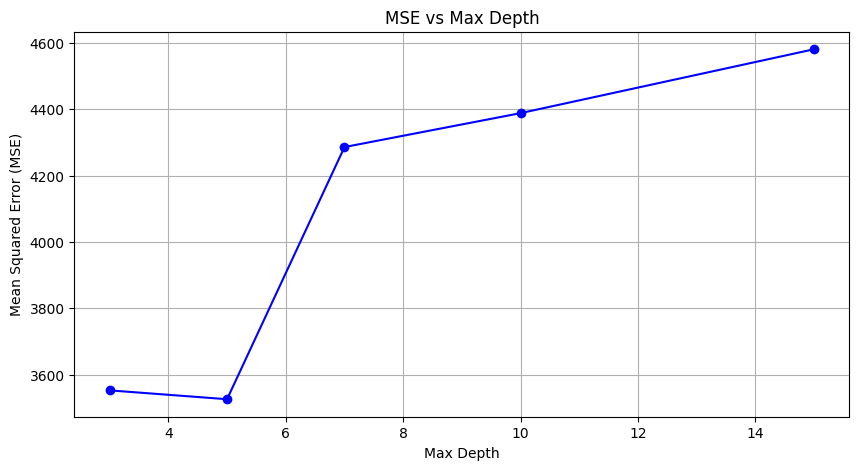

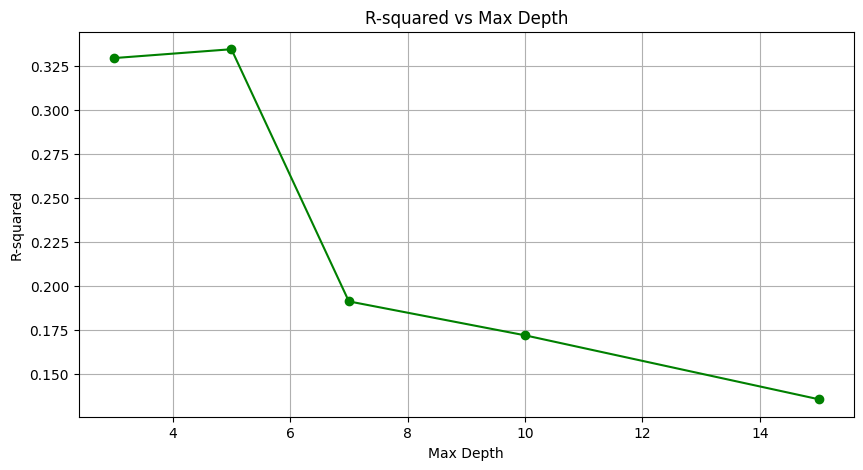

In [12]:
# Plot MSE for different max_depth values
plt.figure(figsize=(10, 5))
plt.plot(depth_values, mse_depth_results, marker='o', color='blue', label='MSE')
plt.title('MSE vs Max Depth')
plt.xlabel('Max Depth')
plt.ylabel('Mean Squared Error (MSE)')
plt.grid(True)
plt.show()

# Plot R-squared for different max_depth values
plt.figure(figsize=(10, 5))
plt.plot(depth_values, r2_depth_results, marker='o', color='green', label='R-squared')
plt.title('R-squared vs Max Depth')
plt.xlabel('Max Depth')
plt.ylabel('R-squared')
plt.grid(True)
plt.show()


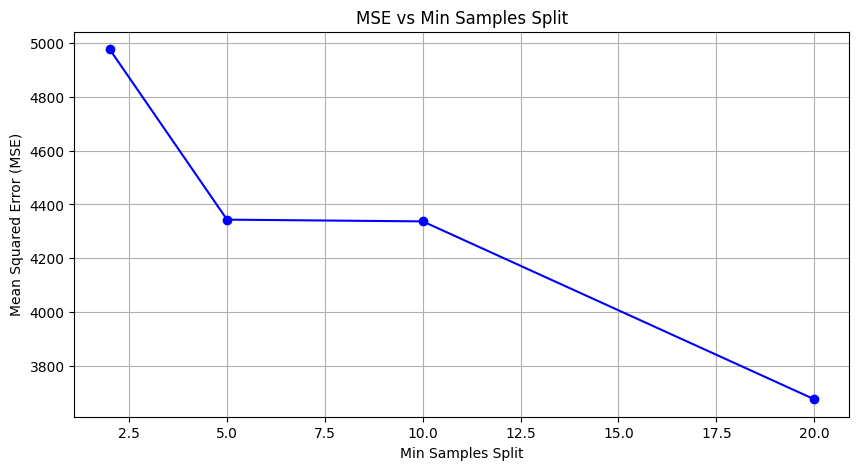

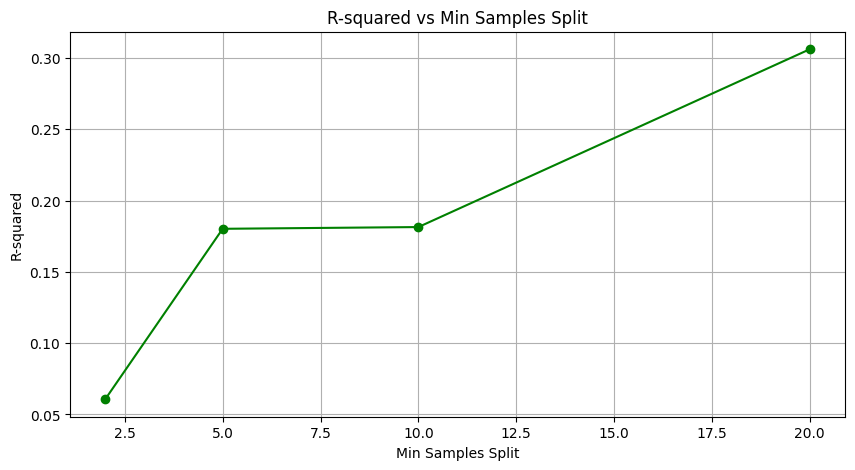

In [13]:
# Plot MSE for different min_samples_split values
plt.figure(figsize=(10, 5))
plt.plot(split_values, mse_split_results, marker='o', color='blue', label='MSE')
plt.title('MSE vs Min Samples Split')
plt.xlabel('Min Samples Split')
plt.ylabel('Mean Squared Error (MSE)')
plt.grid(True)
plt.show()

# Plot R-squared for different min_samples_split values
plt.figure(figsize=(10, 5))
plt.plot(split_values, r2_split_results, marker='o', color='green', label='R-squared')
plt.title('R-squared vs Min Samples Split')
plt.xlabel('Min Samples Split')
plt.ylabel('R-squared')
plt.grid(True)
plt.show()


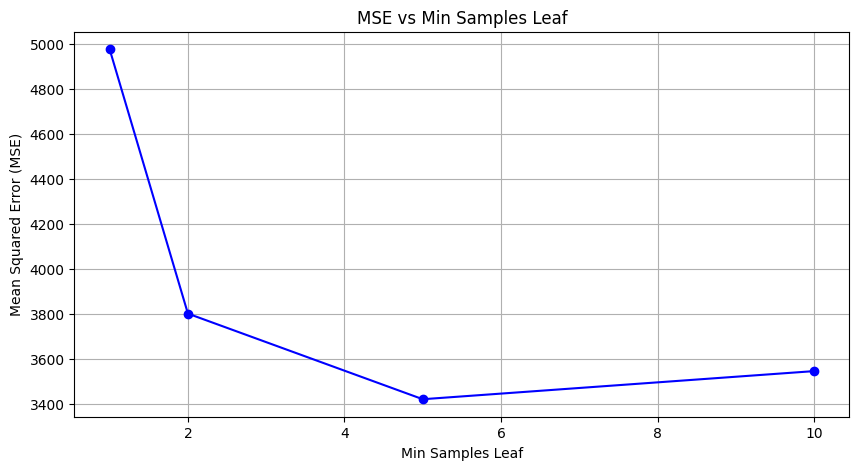

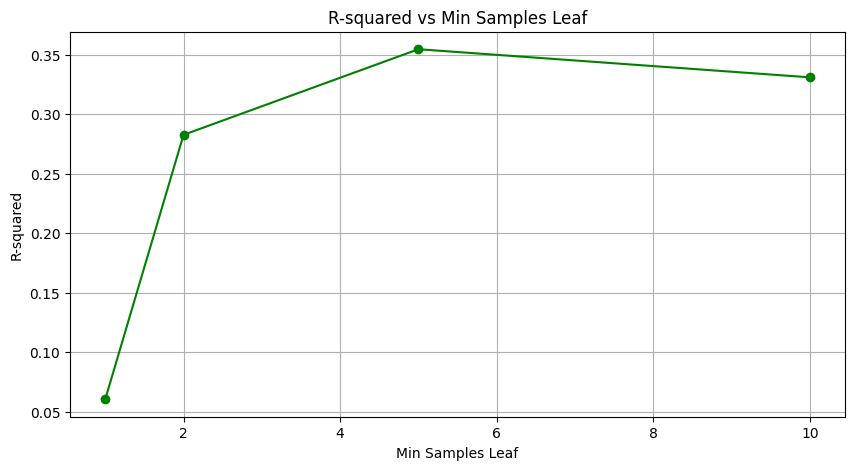

In [14]:
# Plot MSE for different min_samples_leaf values
plt.figure(figsize=(10, 5))
plt.plot(leaf_values, mse_leaf_results, marker='o', color='blue', label='MSE')
plt.title('MSE vs Min Samples Leaf')
plt.xlabel('Min Samples Leaf')
plt.ylabel('Mean Squared Error (MSE)')
plt.grid(True)
plt.show()

# Plot R-squared for different min_samples_leaf values
plt.figure(figsize=(10, 5))
plt.plot(leaf_values, r2_leaf_results, marker='o', color='green', label='R-squared')
plt.title('R-squared vs Min Samples Leaf')
plt.xlabel('Min Samples Leaf')
plt.ylabel('R-squared')
plt.grid(True)
plt.show()
